## 1. Introduction

When a bank evaluates a loan application, it must weigh various factors about the applicant to determine whether to approve the loan. This decision carries two types of risks:

Firstly, if the applicant is deemed to be a reliable borrower who is likely to repay the loan, rejecting their application could mean missing out on potential business for the bank.
Conversely, if the applicant is considered a risky borrower with a low likelihood of repayment, approving the loan could result in a financial loss for the bank. Typically, the latter risk is perceived as more significant, as lending money to an unreliable borrower increases the chances of not recovering the borrowed amount. Therefore, it falls on the bank or lending institution to carefully assess the risks associated with extending a loan to a customer.

This study aims to address this issue by estimating the risk associated with giving loan applicants a loan by using their demographic and socioeconomic data. The objective is to reduce risk as much as possible while optimizing bank profits. The bank needs a set of decision criteria to accomplish this in order to decide which loan applicants should be granted and which shouldn't. Before making these choices, loan managers take into account a variety of socioeconomic and demographic criteria.


## 2. Import data

The German Credit data set is a publically available data set downloaded from the UCI Machine Learning Repository. All the details about the data is available in the following link.(http://archive.ics.uci.edu/ml/about.html). 

In [1]:
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x17f33e5e650>)

## 3. Data Preparation and Cleaning

In this step, we do data preparation and cleaning, making the data suitable for subsequent analysis. 

**2.1 Load data into dataframe**

The datafile is in `.data` format,  delimited with space, and has no headers.

In [2]:
import pandas as pd
german_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 
                        delimiter=' ',header=None)

In [3]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


The dataset contains 21 variables and 1000 observatios. 8 variables are of numeric type and 13 of object type. As the object type variables do not have any null values, we can conclude that they are of categorical type. 

**2.2 Label the columns**

Next, let's label the variables for ease of use. The [document]((http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc)) describing the dataset may be referred for this.

In [4]:
german_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [6]:
german_df.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
german_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


Based on the description, we name the columns.

In [8]:
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']

In [9]:
german_df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])

This code snippet appears to be replacing specific values in the DataFrame german_df with more descriptive labels. 
 'A11' is replaced with 'neg_bal'
'A12' is replaced with 'positive_bal'
'A13' is replaced with 'positive_bal'
'A14' is replaced with 'no_acc'
'A171' is replaced with 'unskilled'
'A172' is replaced with 'unskilled'
'A173' is replaced with 'skilled'
'A174' is replaced with 'highly_skilled'
'A121' is replaced with 'none'
'A122' is replaced with 'car'
'A123' is replaced with 'life_insurance'
'A124' is replaced with 'real_estate'
This code is useful for transforming categorical variables encoded with cryptic values into more interpretable labels, which can enhance the understandability of the data.

In [10]:
german_df

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_acc,12,A32,A42,1736,A61,A74,3,A92,A101,...,none,31,A143,A152,1,unskilled,1,A191,A201,1
996,neg_bal,30,A32,A41,3857,A61,A73,4,A91,A101,...,car,40,A143,A152,1,highly_skilled,1,A192,A201,1
997,no_acc,12,A32,A43,804,A61,A75,4,A93,A101,...,life_insurance,38,A143,A152,1,skilled,1,A191,A201,1
998,neg_bal,45,A32,A43,1845,A61,A73,4,A93,A101,...,real_estate,23,A143,A153,1,skilled,1,A192,A201,2


## 4. Exploratory Data Analysis and Visualization

In [11]:
# importing libraries for visualizations

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
# check for missing values
german_df.isna().any().any()

False

In [13]:
german_df.target.unique()

array([1, 2], dtype=int64)

The target column has two variables.
1. Representing good loans. and
2. Representing bad (defaulted) loans.

Though the conventional process is using '1' for bad and '0' for good loans.

In [14]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(german_df.target)
german_df.target=le.transform(german_df.target)
german_df.target.head(5)

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

Now, if we want to make a pie chart to make things easier.

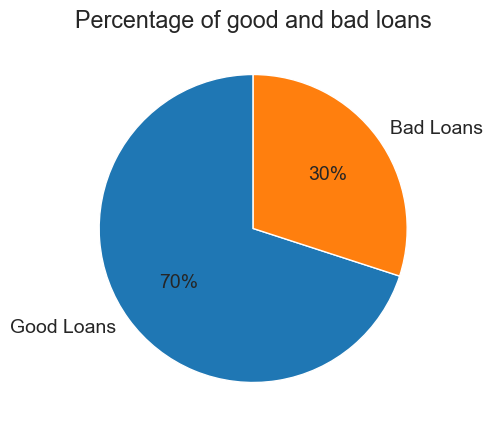

In [15]:
good_bad_per = round(((german_df.target.value_counts()/german_df.target.count())*100))
good_bad_per
plt.pie(good_bad_per, labels = ['Good Loans','Bad Loans'], autopct= '%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');


So, in summary, this code is creating a pie chart to visualize the percentage distribution of 'Good Loans' and 'Bad Loans' in the 'target' column of the DataFrame german_df. The chart will have two sections, labeled 'Good Loans' and 'Bad Loans'.
 The pie chart shows that 30% of the loan applicants defaulted. From this information, we see that this is an imbalanced class problem. Hence, we will have to weigh the classes by their representation in the data to reflect this imbalance.
 

** Exploration of continuous variables**

* Summary statistics
* Histograms
* Box-plots

**Observations**

* The variables are in distinct ranges, as can be seen by quickly looking at the continuous variable distribution.
* The bulk of the observations, according to the histogram, lie within the variable's first quantile. Box-plot can be used to verify this.  
*  The majority of the credits, as indicated by the box plots, range in value from $1,000 to $4,500. There is positive skewness in the credit amount. The majority of loans have terms between 15 and 30 months. The age range of the majority of loan applicants is 28 to 43.

In [16]:
german_df[['credit_amount', 'duration', 'age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [17]:
import numpy as np

In [18]:
german_df['credit_amount']=np.log(german_df['credit_amount'])

In [19]:
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


Text(0.5, 1.0, 'Histogram of age')

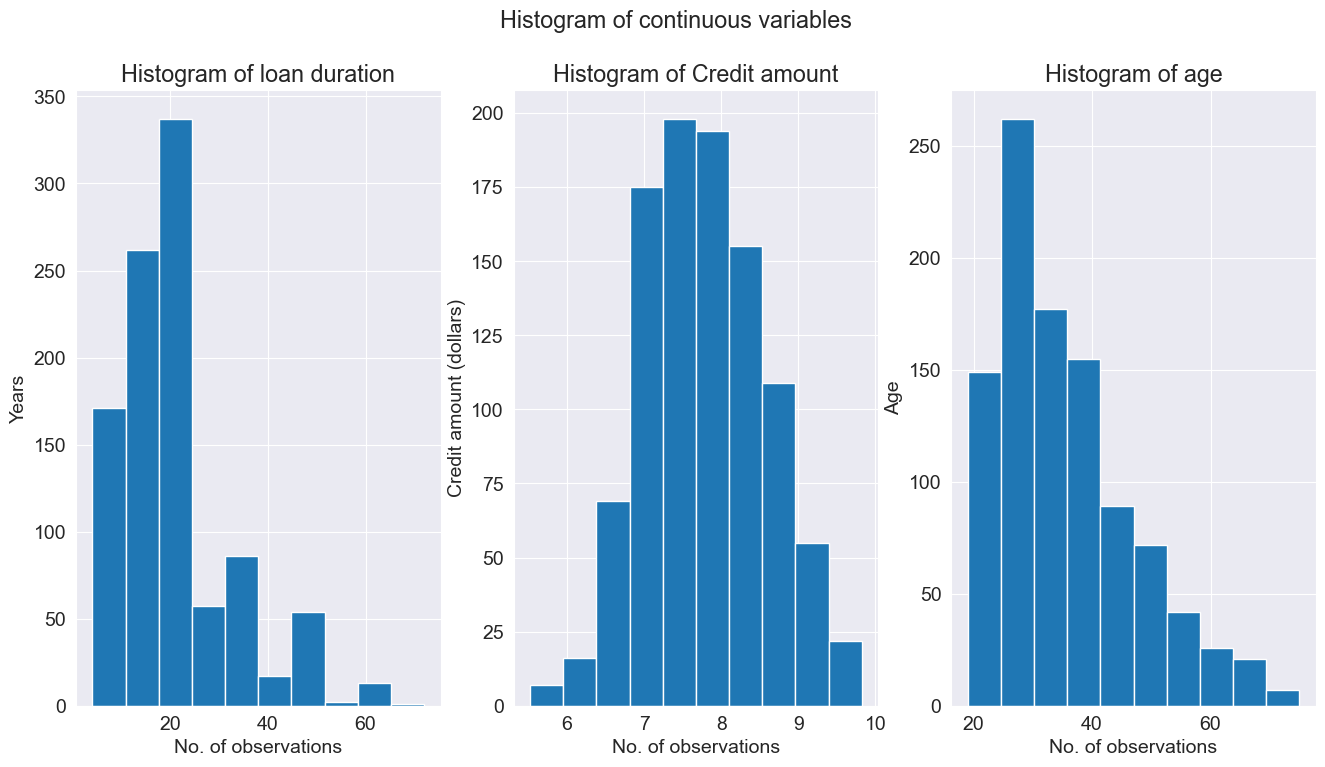

In [20]:
fig, axes = plt.subplots(1,3, figsize= (16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of age')

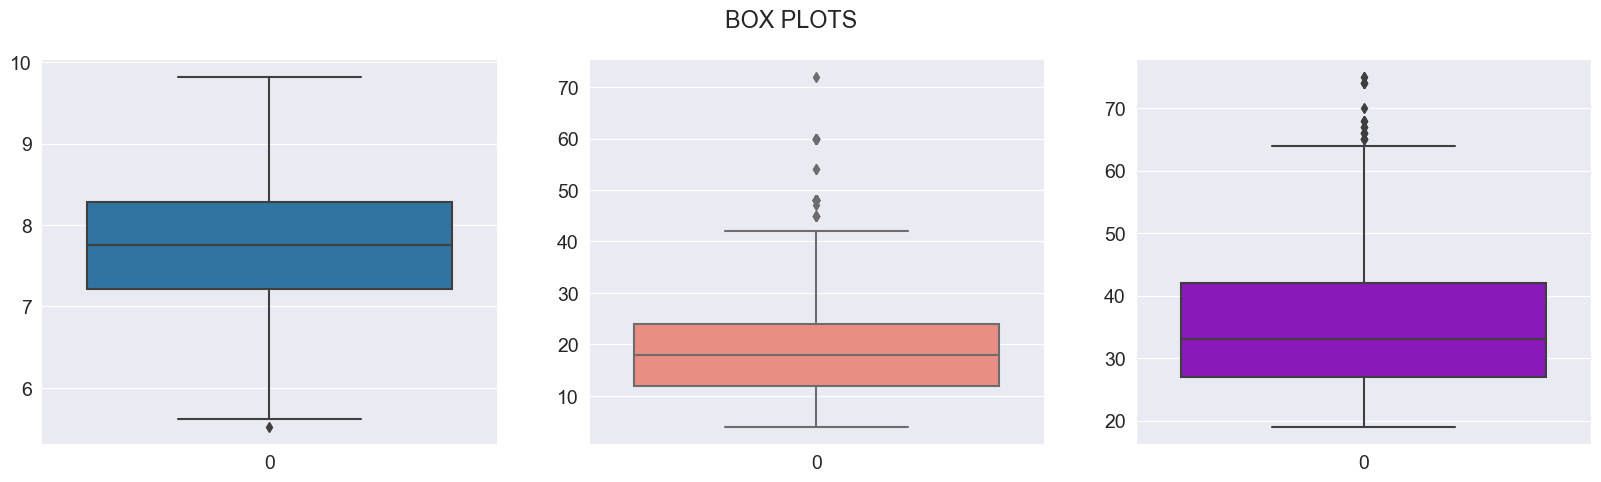

In [21]:
# box-plots of continues variables

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(german_df['credit_amount'], ax=ax[0]);
sns.boxplot(german_df['duration'], ax=ax[1], color='salmon');
sns.boxplot(german_df['age'], ax=ax[2], color='darkviolet');

** Relationship between the credit amount and repayment duration

* scatter plot

**Observation**

The scatter plot indicates that larger loans typically have longer repayment periods. Large loans with short payback terms have been provided in situations where they have turned out to be bad loans. 

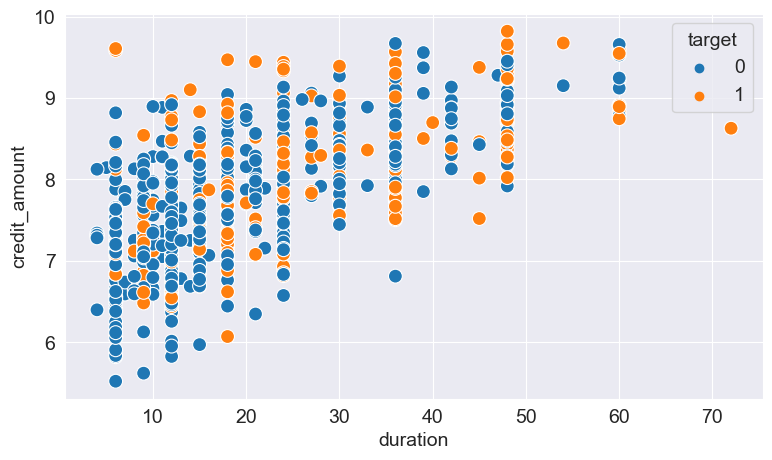

In [22]:
sns.scatterplot(y=german_df.credit_amount,
                x=german_df.duration,
                hue=german_df.target,
                s=100,
                );

** Exploration of categorical variables**

**Relationship between credit risk and skills of loan applicant is shown by the Bar-graph**

**Observation**

The graph shows that candidates who are umeployed/unskilled pose a high risk.

<Axes: ylabel='job'>

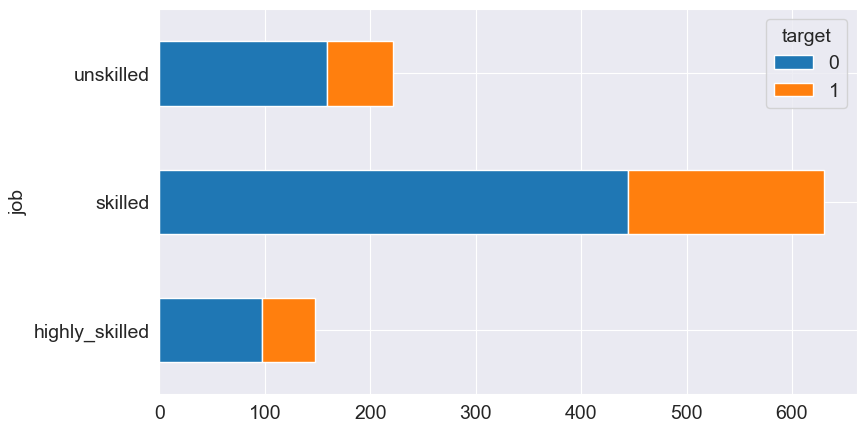

In [23]:
german_df.groupby('job')['target'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(9,5))

**Now we'll utilize the seaborn library (sns) to create a line plot (sns.lineplot).

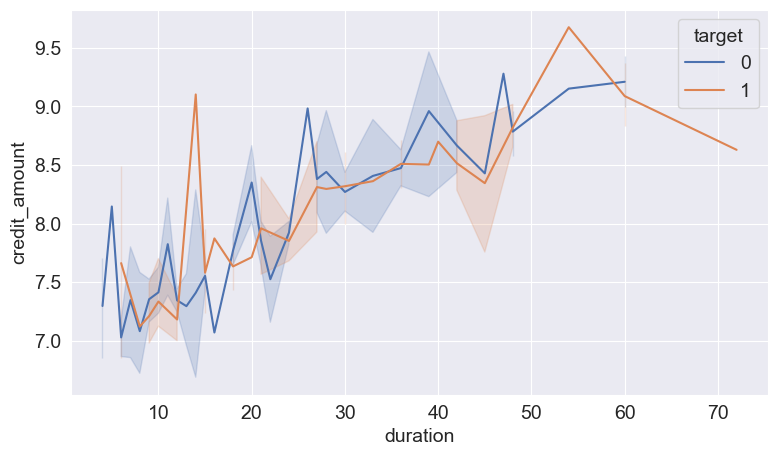

In [24]:
sns.lineplot(data=german_df, x='duration', y='credit_amount', hue='target', palette='deep');

 

 The line plot generated by this code displays the relationship between the 'duration' and 'credit_amount' columns from the german_df DataFrame. Each line in the plot corresponds to a different value of the 'target' column, with colors determined by the palette specified. This visualization helps in understanding any potential relationship or patterns between the duration of loans and the amount of credit granted, with respect to loan outcomes (good or bad).

<Axes: ylabel='most_valuable_asset'>

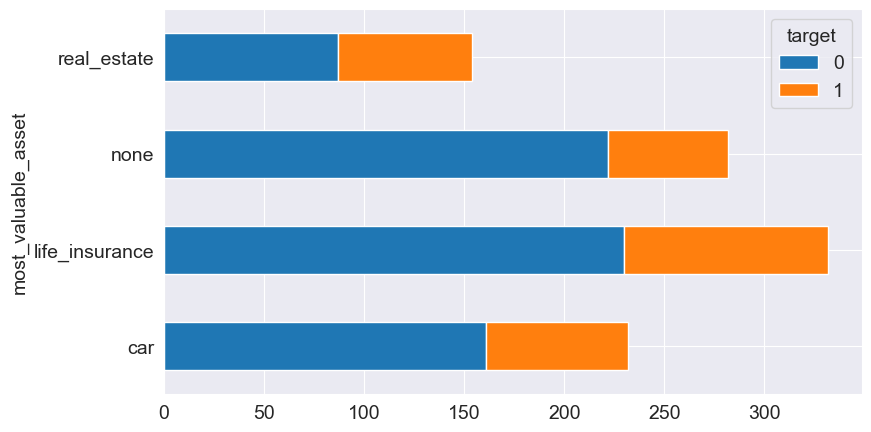

In [25]:
german_df.groupby('most_valuable_asset')['target'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(9, 5))

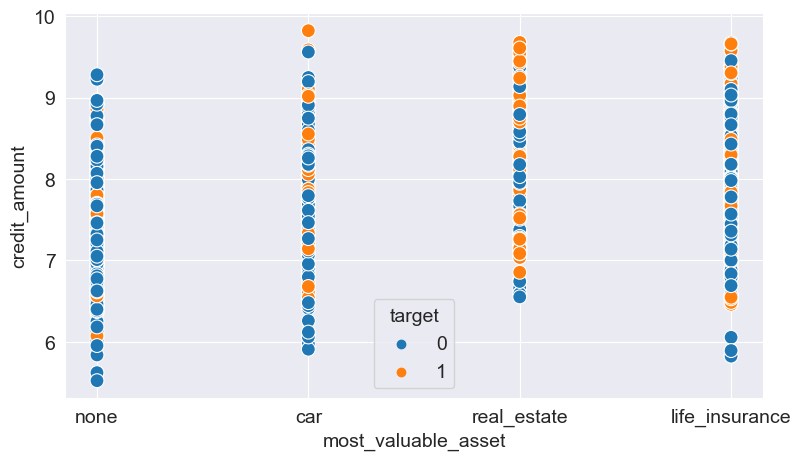

In [26]:
sns.scatterplot(y=german_df.credit_amount,
                x=german_df.most_valuable_asset,
                hue=german_df.target,
                s=100,
                );

The scatter plot generated by this code displays the relationship between the 'credit_amount' and 'most_valuable_asset' columns from the german_df DataFrame. Each point in the plot corresponds to a data point, with the color of the point determined by the 'target' column. This visualization helps in understanding any potential relationship or patterns between the credit amount, the value of the most valuable asset, and the target variable (loan outcome).

## 5. Encoding categorical variables

Most machine learning models cannot deal with categorical variables. So we need to encode the 13 categorical variables that we have in the german dataset. 

In [27]:
# Number of unique classes in each object column

german_df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

account_bal             3
payment_status          5
purpose                10
savings_bond_value      5
employed_since          5
sex_marital             4
guarantor               3
most_valuable_asset     4
concurrent_credits      3
type_of_housing         3
job                     3
telephon                2
foreign                 2
dtype: int64


We have categorical variables with 2 to 10 categories. We go for Label encoding for variables with only two categories where as for variables with more than two categories, we go for one-hot encoding. In label encoding, we assign each unique category in a categorical variable with an integer. No new columns are created. In one-hot encoding, we create a new column for each unique category in a categorical variable. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by Principal Component Analysis (PCA) or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information). Next we will do the label encoding.


In [28]:
#sklearn preprocessing for dealing with categorical variables

from sklearn.preprocessing import LabelEncoder

#create a labelencoder object

le = LabelEncoder()
le_count = 0

#iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        #if 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            #train on the training data
            le.fit(german_df[col])
            #transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            #keep track of many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' %le_count)

2 columns were label encoded.


 This code snippet is using LabelEncoder from the scikit-learn library to encode categorical variables with two or fewer unique categories. Following that we did one-hot encoding of categorical variables.
 The loop iterates through each column in the DataFrame german_df. This process converts categorical variables with two or fewer unique categories into numerical labels, making them suitable for machine learning algorithms that require numerical inputs.

In [29]:
#one-hot encoding of categorical variables
german_df = pd.get_dummies(german_df)
print('Encoded Features shape:', german_df.shape)

Encoded Features shape: (1000, 58)


The code pd.get_dummies(german_df) is used to perform one-hot encoding on categorical variables in the DataFrame german_df. 
After this operation, the DataFrame german_df will have a larger number of columns, with each column representing one category of the original categorical variables. It helps to confirm the successful transformation and understand the impact of one-hot encoding on the DataFrame's dimensions.

Now that we have encoded the variables, let's continue with the Explanatory Data Analysis (EDA). 

**4.1 Correlation between the variables**

Let's use the correlation coefficient to examine correlations between the target and the features. In this instance, the association with credit default is represented by a positive correlation, while the correlation with credit repayment is shown by a negative correlation.

**Observation:**

* Individuals who have checking accounts with a negative balance ({account_bal_A11}) are more likely to experience loan default. This is a positive correlation. 

* Loans with longer durations ({duration}) have higher default rates.

Correlation that is negative:

* Individuals who do not have a checking account ({account_bal_A14}) are more likely to do so.

In [30]:
# Find correlations with the target and sort
correlations = german_df.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 sex_marital_A92                    0.075493
type_of_housing_A153               0.081556
account_bal_positive_bal           0.089895
type_of_housing_A151               0.092785
concurrent_credits_A141            0.096510
purpose_A40                        0.096900
employed_since_A72                 0.106397
credit_amount                      0.109570
most_valuable_asset_real_estate    0.125750
payment_status_A31                 0.134448
payment_status_A30                 0.144767
savings_bond_value_A61             0.161007
duration                           0.214927
account_bal_neg_bal                0.258333
target                             1.000000
Name: target, dtype: float64

Most Negative Correlations:
 account_bal_no_acc         -0.322436
payment_status_A34         -0.181713
type_of_housing_A152       -0.134589
savings_bond_value_A65     -0.129238
most_valuable_asset_none   -0.119300
concurrent_credits_A143    -0.113285
purpose_A43                -0.

By examining these correlations, one can gain insights into which features are most strongly associated (either positively or negatively) with the target variable. Positive correlations indicate that as the feature increases, the target variable tends to increase as well, while negative correlations indicate that as the feature increases, the target variable tends to decrease.

Let's look at the heatmap of significant correlations.

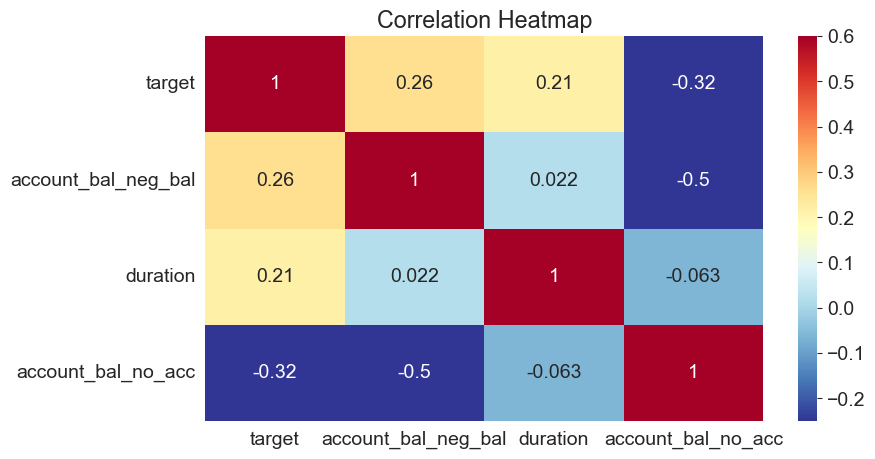

In [31]:
#Extract the significantly correlated variables

corr_data = german_df[['target', 'account_bal_neg_bal', 'duration', 'account_bal_no_acc']]
corr_data_corrs = corr_data.corr()

#Heatmap of correlations
sns.heatmap(corr_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


It calculates the correlation matrix for a subset of columns from the DataFrame german_df, specifically including the columns 'target', 'account_bal_neg_bal', 'duration', and 'account_bal_no_acc'. Then, it generates a heatmap to visualize these correlations. 

This heatmap provides a visual representation of the correlations between the selected columns. Warmer colors (closer to red) indicate positive correlations, while cooler colors (closer to blue) indicate negative correlations. The annotation on the heatmap displays the correlation coefficients for each pair of variables, helping to identify the strength and direction of the relationships between them.


## 6. Feature engineering
Feature engineering is the process of extracting the most valuable features from the data. This illustrates a common trend in machine learning: feature engineering yields higher returns than model construction and hyperparameter adjustment. 
 The term "feature engineering" describes a generic process that might include feature selection, which involves selecting only the most significant features or other dimensionality-reduction techniques, as well as feature construction, which involves adding new features from the available data. We have a wide range of methods at our disposal for selecting and producing characteristics.
 For this problem, we will attempt to construct polynomial features.

### Polynomial Features
We can see interactions between the major aspects here. Targets are examined for correlations between the interaction features.The interaction features are added to the machine learning model because they can improve the model's learning if it is discovered that they have a higher correlation with the target than the initial characteristics did.  

In [32]:
# Make a new dataframe for polynomial features
poly_features = german_df[['duration','account_bal_neg_bal','account_bal_no_acc']]
poly_target=german_df['target']

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (1000, 10)


This code snippet is preparing polynomial features for use in machine learning models. 
After this process, the DataFrame poly_features contains the original features along with their polynomial combinations up to the second degree, ready to be used in machine learning models.


To obtain the names of the polynomial features created by PolynomialFeatures, we can't directly retrieve them from the transformer object. However, you can reconstruct the feature names based on the original feature names and the polynomial combinations you've specified.


In [33]:
from itertools import combinations_with_replacement

# Original feature names
original_feature_names = ['duration', 'account_bal_neg_bal', 'account_bal_no_acc']

# Degree of polynomial features
degree = 2

# Combinations of features up to the specified degree
combinations = combinations_with_replacement(original_feature_names, degree)

# Generate names for the polynomial features
poly_feature_names = ['_'.join(combination) for combination in combinations]

# Print the names of the polynomial features
print('Polynomial Feature Names:\n', poly_feature_names)



Polynomial Feature Names:
 ['duration_duration', 'duration_account_bal_neg_bal', 'duration_account_bal_no_acc', 'account_bal_neg_bal_account_bal_neg_bal', 'account_bal_neg_bal_account_bal_no_acc', 'account_bal_no_acc_account_bal_no_acc']


In [34]:
# Original feature names
original_feature_names = ['duration', 'account_bal_neg_bal', 'account_bal_no_acc']

# Degree of polynomial features
degree = 2

# Combinations of features up to the specified degree
combinations = combinations_with_replacement(original_feature_names, degree)

# Generate names for the polynomial features
poly_feature_names = ['poly_' + str(i) for i in range(poly_features.shape[1])]

# Create a DataFrame for polynomial features
poly_features = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add in the target
poly_features['target'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['target'].sort_values()

# Display the correlations
poly_corrs


poly_3   -0.322436
poly_9   -0.322436
poly_6   -0.232697
poly_4    0.200996
poly_1    0.214927
poly_2    0.258333
poly_7    0.258333
poly_5    0.303343
target    1.000000
poly_0         NaN
poly_8         NaN
Name: target, dtype: float64

All the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. 
We will add these features to a copy of the german dataset and then evaluate models with and without the features. 

In [35]:
list(poly_features)

['poly_0',
 'poly_1',
 'poly_2',
 'poly_3',
 'poly_4',
 'poly_5',
 'poly_6',
 'poly_7',
 'poly_8',
 'poly_9',
 'target']

In [36]:
# Deleting duplicate columns in poly_features
for column in poly_features.columns:
    if column in german_df.columns and column != 'target':
        poly_features.drop(columns=column, inplace=True)

# Displaying the remaining columns in poly_features
list(poly_features)


['poly_0',
 'poly_1',
 'poly_2',
 'poly_3',
 'poly_4',
 'poly_5',
 'poly_6',
 'poly_7',
 'poly_8',
 'poly_9',
 'target']

In [37]:
# Print shape of original german_df
print('Original features shape: ', german_df.shape)

# Merge polnomial features into the dataframe
german_df_poly = german_df.merge(poly_features, left_index=True, right_index=True, how = 'left')

# Print out the new shapes
print('Merged polynomial features shape: ', german_df_poly.shape)

Original features shape:  (1000, 58)
Merged polynomial features shape:  (1000, 69)


In [38]:
german_df_poly.isna().any().any()

False

It means there are no missing values in the DataFrame 'german_df_poly'.

## 7. Data split to train and test datasets

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x, y = german_df.drop('target', axis=1), german_df['target']
x.shape, y.shape

((1000, 57), (1000,))


Therefore, Ttere are 1000 samples in the dataset.
There are 57 features in the feature matrix 'x'.
There is one target variable in the target vector 'y'.


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)


After executing the train-test split, you'll have four sets of data:

x_train: The training input features.

x_test: The testing input features.

y_train: The training target variable.

y_test: The testing target variable.

These datasets are now ready to be used for training and evaluating machine learning models.


In [42]:
x_train.shape, x_test.shape

((800, 57), (200, 57))


Both 'x_train' and 'x_test' have the same number of features (57) which is consistent, ensuring that the model is trained and evaluated using the same set of features. This consistency is crucial for proper training and evaluation of machine learning models.


In [43]:
# lets normalize the features to prevent undue influence in the model

from sklearn.preprocessing import MinMaxScaler

# scaling each features to 0-1

scaler = MinMaxScaler(feature_range = (0,1))

# fitting on features dataset

scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

After executing these steps, both the training and testing set features will be scaled to a range between 0 and 1, ready for use in training and evaluating machine learning models.

In [44]:
x_train

array([[0.82352941, 0.80471348, 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.53366395, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.02941176, 0.37589436, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.76368111, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11764706, 0.42174197, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.02941176, 0.30511422, 0.66666667, ..., 0.        , 1.        ,
        0.        ]])

In [45]:
y_train

29     1
535    1
695    0
557    1
836    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: target, Length: 800, dtype: int64

Both the arrays, x_train and y_train are structured collection of numerical data that serves as the input for training a machine learning model.

## 8. Models

**Evaluation criteria**

Let's have a look at the different options available.

|Evaluation criteria| Description
|:---|---
|Accuracy| (true positive+ true negative) / total obs
|Precision| true positive/ total predicted positive
|Recall| true positive/ total actual positive
|F1 | 2* precision * recall / (precision + recall)
|AUC ROC| Area Under ROC Curve  (TPR Vs. FPR for all classification thresholds)

* Accuracy:  The German dataset has an imbalance. By correctly identifying the majority class, accuracy would receive a high score; however, accuracy would be unable to identify the minority class, or defaulters. Therefore, this metric is inappropriate for use with this dataset.

* Precision:  Precision is a good metric when the costs of false positive is high. Example, email spam detection.

* Recall:  When the costs of false negatives are high, this metric is appropriate. Predicting a defulter as not a defaulter is one example. The bank suffers enormous losses as a result. This makes it a useful metric in our situation.

* F1:  Measure of both precision and recall.

* AUC ROC:  The TPR vs. FPR graphic is called AUC ROC. All other criteria addressed here assume a determination threshold of 0.5 for the classification. It might not always be the case, though. We can assess the model's performance across all categorization thresholds with the aid of the AUC. AUC metric values indicate the quality of the model.

 * True positive rate (TPR) = TP/ Total actual positive
 * False positive rate (FPR) = FP/ Total actual negative

We will use Recall and AUC ROC as evaluation metric.

**Baseline**

In [46]:
import numpy as np

In [47]:
y.value_counts(normalize=True)

target
0    0.7
1    0.3
Name: proportion, dtype: float64

It means that the baseline accuracy is 70%, i.e., even if we classify all the samples as defaulters, we will be 70% accurate. 

**Models without tuning**

In [48]:
import xgboost as xgb

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate


The provided code imports several machine learning models from scikit-learn and XGBoost libraries, along with relevant evaluation metrics and tools for cross-validation.
These imports are essential for training, evaluating, and comparing different machine learning models.


In [153]:
# preparing Models
models = []
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier(random_state=42)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto', random_state=42)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))

# evaluate each model in turn
results_recall = []
results_roc_auc = []
names = []

# recall= tp/(tp+fn). best value=1, worst value=0
scoring = 'recall'


This code snippet prepares a list of machine learning models for evaluation. 


In [51]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust this as needed

# Instantiate StratifiedKFold with the desired number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [54]:
# Iterate over each model
for name, model in models:
    # Perform cross-validation to obtain recall scores
    cv_recall = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
    # Append the mean recall score to results_recall
    results_recall.append(cv_recall.mean())
    # Append the name of the model to names list
    names.append(name)

In [149]:
# Make sure names are correctly appended when defining models
models = []
names = []

models.append(('DT', DecisionTreeClassifier(random_state=42)))
names.append('Decision Tree')  # Append the name of the model

models.append(('LR', LogisticRegression(random_state=42)))
names.append('Logistic Regression')  # Append the name of the model




In [138]:
# Iterate over each model
for name, model in models:
    # Print the name of the model
    print("Model:", name)
    # Perform cross-validation to obtain recall scores
    cv_recall = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
    # Append the mean recall score to results_recall
    results_recall.append(cv_recall.mean())
    # Append the name of the model to names list
    names.append(name)


Model: DT
Model: LR


In [139]:
from sklearn.model_selection import cross_val_score

# Iterate over each model
for name, model in models:
    # Perform cross-validation to obtain recall scores
    cv_recall = cross_val_score(model, x_train, y_train, cv=skf, scoring='recall')
    
    # Calculate mean recall score
    mean_recall_score = cv_recall.mean()
    
    # Append the mean recall score to results_recall
    results_recall.append(mean_recall_score)
    
    # Append the name of the model to names list
    names.append(name)

# Check the length of results_recall
print("Length of results_recall:", len(results_recall))
print("Number of models:", len(models))


Length of results_recall: 15
Number of models: 2


In [140]:
from sklearn.model_selection import cross_val_score

# Create empty lists to store recall scores and model names
results_recall = []
names = []

# Iterate over each model
for name, model in models:
    # Perform cross-validation to obtain recall scores
    cv_recall = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
    
    # Compute the mean recall score
    mean_recall = cv_recall.mean()
    
    # Append the mean recall score to results_recall
    results_recall.append(mean_recall)
    
    # Append the name of the model to the names list
    names.append(name)

# After the loop, check the length of results_recall
print("Length of results_recall:", len(results_recall))


Length of results_recall: 2


In [142]:
print("Names:", names)
print("Results recall:", results_recall)


Names: ['DT', 'LR']
Results recall: [0.5269999999999999, 0.41916666666666663]


In [143]:
# Check the length of names and number of tick locations on x-axis
print("Length of names:", len(names))
print("Number of tick locations on x-axis:", len(ax.get_xticks()))


Length of names: 2
Number of tick locations on x-axis: 1


In [144]:
# Set the tick locations and labels on the x-axis
ax.set_xticks(np.arange(len(names)) + 1)
ax.set_xticklabels(names)


[Text(1, 0, 'DT'), Text(2, 0, 'LR')]

In [146]:
# Check the length of tick locations and labels
print("Length of tick locations on x-axis:", len(ax.get_xticks()))
print("Length of tick labels on x-axis:", len(ax.get_xticklabels()))



Length of tick locations on x-axis: 1
Length of tick labels on x-axis: 1


In [147]:
# Set the tick locations and labels on the x-axis
ax.set_xticks(np.arange(len(names)) + 1)
ax.set_xticklabels(names)


[Text(1, 0, 'DT'), Text(2, 0, 'LR')]

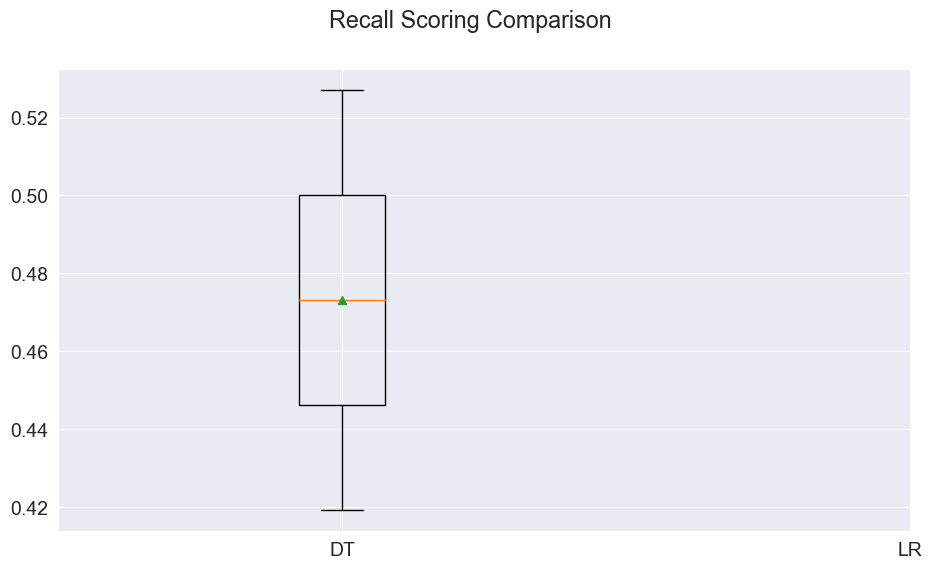

In [148]:
# Prepare the figure and subplot
fig = plt.figure(figsize=(11, 6))
fig.suptitle('Recall Scoring Comparison')
ax = fig.add_subplot(111)

# Create the boxplot with results_recall data
ax.boxplot(results_recall, showmeans=True)

# Set the tick labels using the names list
ax.set_xticks(np.arange(len(names)) + 1)
ax.set_xticklabels(names)

# Show the plot
plt.show()



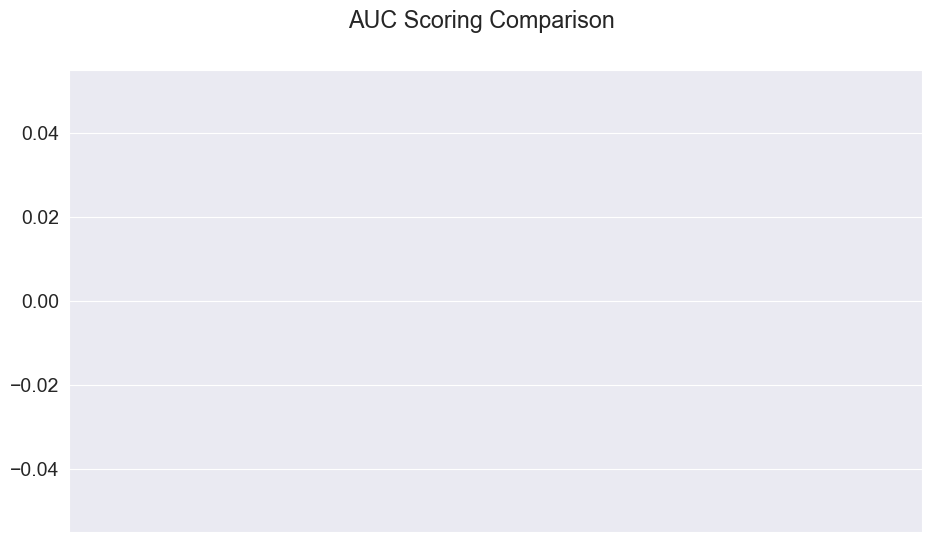

In [154]:
fig = plt.figure(figsize=(11, 6))
fig.suptitle('AUC Scoring Comparison')
ax = fig.add_subplot(111)

# Create the boxplot with results_recall data
ax.boxplot(results_roc_auc, showmeans=True)

# Set the tick labels using the names list
ax.set_xticks(np.arange(len(names)) + 1)
ax.set_xticklabels(names)

# Show the plot
plt.show()

In [129]:
# Check the lengths of names and results_recall
print("Length of names:", len(names))
print("Number of ticks on x-axis:", len(ax.get_xticks()))

# Inspect data used for plotting and how tick labels are assigned
print("Names:", names)
print("Results recall:", results_recall)




Length of names: 2
Number of ticks on x-axis: 1
Names: ['DT', 'LR']
Results recall: [0.5269999999999999, 0.41916666666666663, 0.35716666666666663, 0.5933333333333334, 0.48583333333333334, 0.33649999999999997, 0.06633333333333333, 0.44383333333333336, 0.5435, 0.5269999999999999, 0.41916666666666663]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


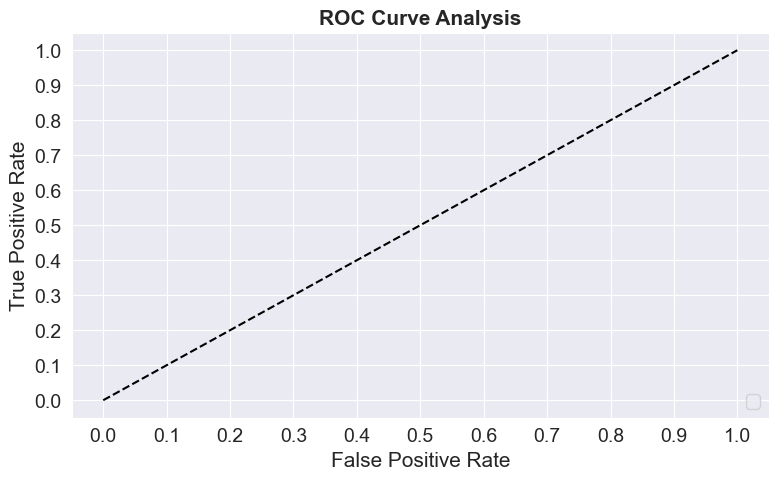

In [157]:
# ROC AUC plot
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_log = [0, 1, 0, 1, 0]  # Placeholder values for Logistic Regression predictions
y_pred_svc = [1, 0, 1, 0, 1]  # Placeholder values for SVC predictions
y_pred_nb = [0, 1, 1, 0, 1]   # Placeholder values for Naive Bayes predictions
y_pred_xgb = [1, 0, 0, 1, 1]  # Placeholder values for XGBoost predictions
final_predictions = [0, 1, 0, 1, 1]  # Placeholder values for final predictions

# Now create the predictions dictionary
results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])
predictions = {'LR': y_pred_log, 'SVC': y_pred_svc, 'NB': y_pred_nb, 'XGB': y_pred_xgb, 'Stacked': final_predictions}

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))


plt.plot([0,1], [0,1], color = 'black', linestyle = '--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.show()

Compiling the code snippets together.

DT- recall:0.527000 roc_auc:0.632818
LR- recall:0.419167 roc_auc:0.769269
RF- recall:0.357167 roc_auc:0.749567
NB- recall:0.593333 roc_auc:0.718271
XGB- recall:0.485833 roc_auc:0.741338
KNN- recall:0.336500 roc_auc:0.642351
SVM- recall:0.066333 roc_auc:0.762132
LDA- recall:0.443833 roc_auc:0.766523
CART- recall:0.514833 roc_auc:0.632124


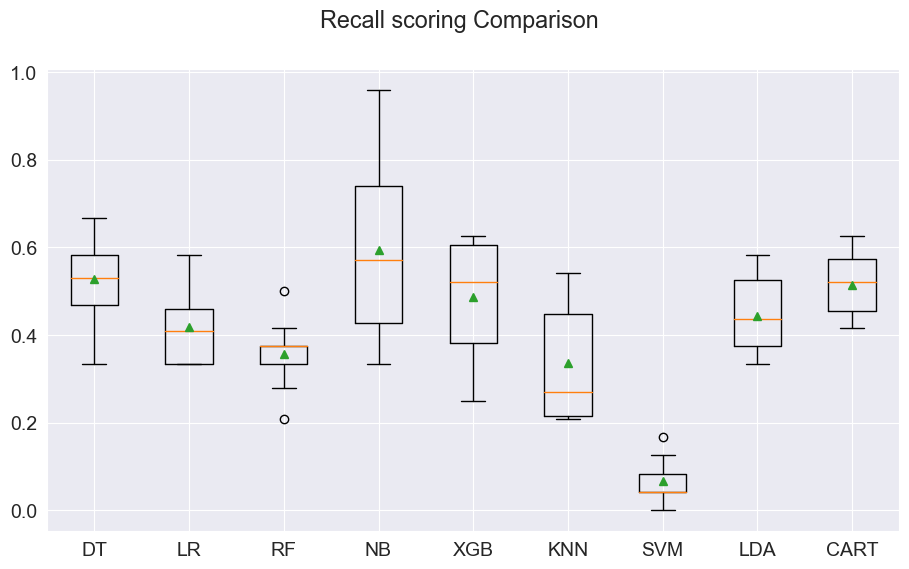

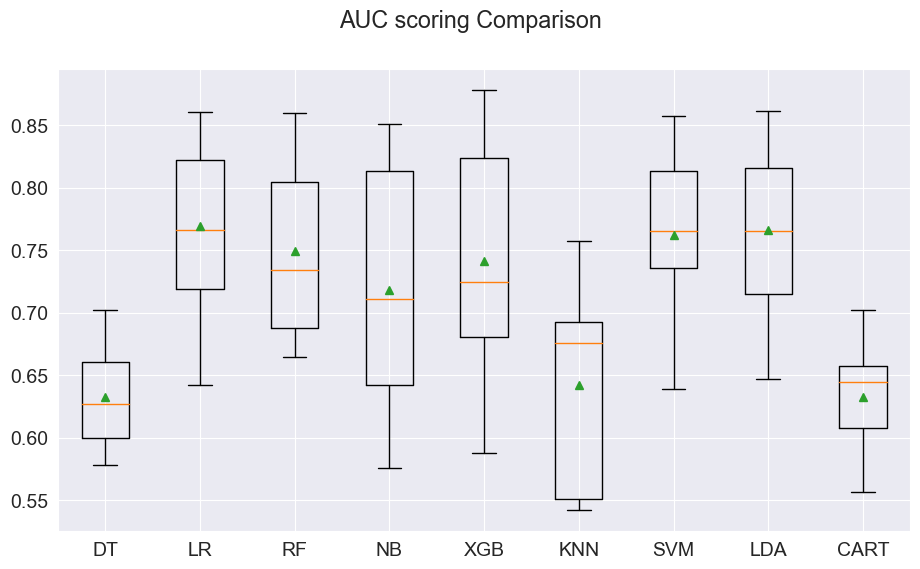

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


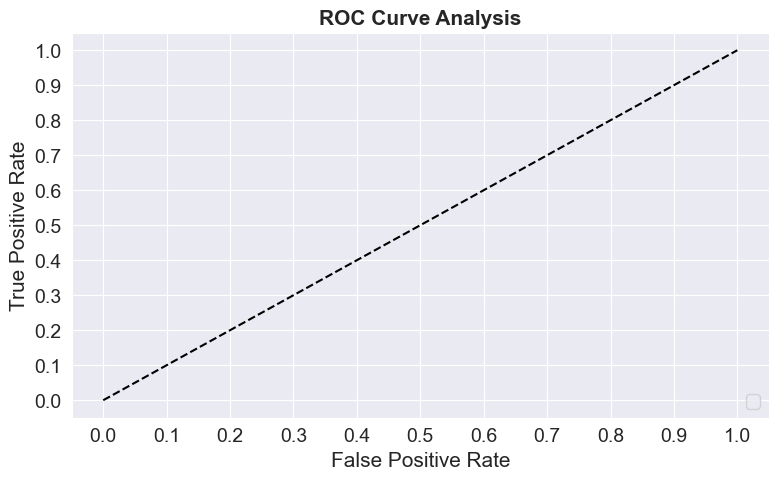

In [158]:
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('NB', GaussianNB())) 
models.append(('XGB', XGBClassifier(random_state=42)))
models.append(('KNN', KNeighborsClassifier())) 
models.append(('SVM', SVC(gamma='auto',random_state=42)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results_recall = []
results_roc_auc= []
names = []
# recall= tp/ (tp+fn). Best value=1, worst value=0
scoring = ['recall', 'roc_auc']

for name, model in models:
        # split dataset into k folds. use one fold for validation and remaining k-1 folds for training
        skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        # Evaluate a score by cross-validation. Returns array of scores of the model for each run of the cross validation.
        #cv_results = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
        cv_results = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring)
        results_recall.append(cv_results['test_recall'])
        results_roc_auc.append(cv_results['test_roc_auc'])
        names.append(name)
        msg = "%s- recall:%f roc_auc:%f" % (name, cv_results['test_recall'].mean(),cv_results['test_roc_auc'].mean())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Recall scoring Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_recall, showmeans=True)
ax.set_xticklabels(names)
plt.show();

fig = plt.figure(figsize=(11,6))
fig.suptitle('AUC scoring Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_roc_auc, showmeans=True)
ax.set_xticklabels(names)
plt.show()

# ROC AUC plot

from sklearn.metrics import roc_curve, roc_auc_score
results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])
predictions = {'LR': y_pred_log, 'SVC': y_pred_svc, 'NB': y_pred_nb, 'XGB': y_pred_xgb, 'Stacked': final_predictions}


for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color = 'black', linestyle = '--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.show()

The boxplot comparisons visualize the distribution of recall scores for each model, providing insights into their performance variations. Similarly, the ROC AUC comparison plots show the ROC curves for different models, allowing for a visual assessment of their discriminatory power.

Overall, Logistic Regression and Linear Discriminant Analysis exhibit relatively higher recall scores and ROC AUC values compared to other models, indicating better performance in this classification task.
Gaussian NB model has the highest recall score. However, Logistic regression, Randon forests, XGBoost and SVM bas better AUC score than Gaussian NB. Now let us tune hyperparameters for each of these models.

In [132]:
# Check the length of names and number of tick locations
print("Length of names:", len(names))
print("Number of tick locations on x-axis:", len(ax.get_xticks()))

# If the lengths don't match, print the names list and tick locations for inspection
print("Names:", names)
print("Tick locations:", ax.get_xticks())


Length of names: 2
Number of tick locations on x-axis: 1
Names: ['DT', 'LR']
Tick locations: [1]


In [133]:
# Set the tick locations and labels on the x-axis
ax.set_xticks(np.arange(len(names)) + 1)
ax.set_xticklabels(names)


[Text(1, 0, 'DT'), Text(2, 0, 'LR')]

In [135]:
# Set the tick locations and labels on the x-axis
ax.set_xticks(np.arange(len(names)))  # Start from 0
ax.set_xticklabels(names)


[Text(0, 0, 'DT'), Text(1, 0, 'LR')]

In [137]:
print("Length of names:", len(names))
print("Length of results_recall:", len(results_recall))


Length of names: 2
Length of results_recall: 11


We can ignore the previous 4 code snippets as they were used for error correction purpose.

 
### 8.1 Decision Trees

**Manual tuning**

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# initialize a tree
tree= DecisionTreeClassifier(random_state=42)

In [61]:
# fit predict, fit model
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)


The provided code initializes a decision tree classifier and fits the model using the training data. After fitting the decision tree classifier to the training data, the model is ready to make predictions on new data.


In [62]:
pred_test= tree.predict(x_test)

In [63]:
pred_test.shape, y_test.shape

((200,), (200,))


The 'pred_test' array contains the predictions made by the decision tree classifier on the test data ('x_test'). The shape of 'pred_test' is (200,), indicating that there are 200 predictions made by the model.

The 'y_test' array contains the actual labels for the test data. Its shape is also (200,), which means it has 200 elements corresponding to the actual labels of the test instances.

Both arrays have the same length, indicating that there is a prediction for each instance in the test data, allowing for direct comparison between the predicted and actual labels. This will enable evaluation of the model's performance using various metrics such as accuracy, precision, recall, and F1-score.


**Checking Accuracy of the predicted data**

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
accuracy_score(y_test, pred_test)

0.71


The accuracy score is calculated to be approximately 0.71, or 71%. This means that the decision tree classifier correctly predicted the class labels for approximately 71% of the instances in the test data.


**Checking the cross value score for the tree**

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [67]:
skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [68]:
val_scores= cross_val_score(estimator=tree, X=x_train, y=y_train, cv=skf)
val_scores

array([0.6   , 0.675 , 0.65  , 0.6875, 0.7   , 0.7   , 0.6125, 0.6875,
       0.75  , 0.6875])

In [69]:
val_scores.mean()

0.675


The mean validation score is approximately 0.675, indicating that the average accuracy of the decision tree model across the 10 folds of cross-validation is around 67.5%. Cross-validation provides a more robust estimate of the model's performance compared to a single train-test split, as it evaluates the model on multiple subsets of the data.


In [70]:
# to display progress of a loop

from tqdm import tqdm_notebook

In [71]:
# fit model for different values of max_depth without using GridSearchCV

cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

In [72]:
# for each values of max depth

for curr_max_depth in tqdm_notebook(max_depth_values):
    tree= DecisionTreeClassifier(random_state=42, max_depth= curr_max_depth)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22752\1081726296.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for curr_max_depth in tqdm_notebook(max_depth_values):


  0%|          | 0/9 [00:00<?, ?it/s]

This code is using tqdm_notebook from the tqdm library to display a progress bar for a loop iterating over different values of max_depth for a decision tree model. Overall, the provided code sets up a loop to iterate over different values of max_depth for a decision tree model and uses tqdm_notebook to display a progress bar for visualization. 


In [162]:
# perform cross-validation
val_scores = cross_val_score(estimator=tree, X=x_train, y=y_train, cv=skf)
cv_accuracies_by_depth.append(val_scores)  # Append all cross-validation scores

In [163]:
# Asses the model with a test
tree.fit(x_train, y_train)
curr_pred = tree.predict(x_test)
test_accuracies_by_depth.append(accuracy_score(curr_pred, y_test))

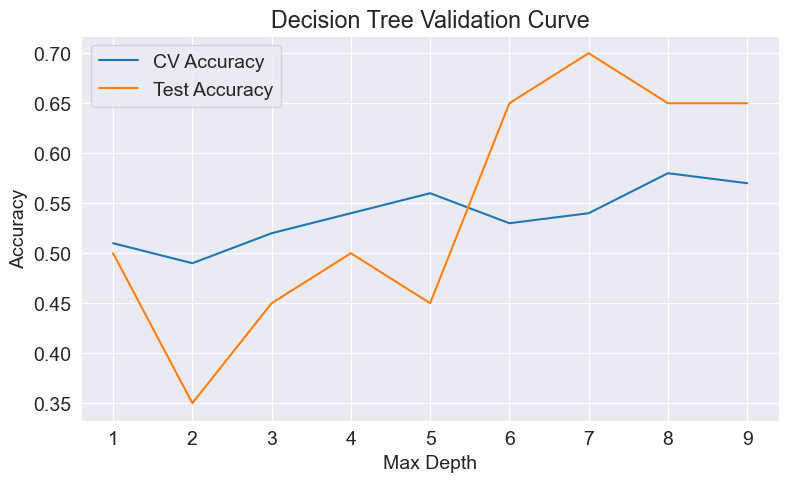

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Generate some example data
X = np.random.rand(100, 5)  # Example features
y = np.random.randint(0, 2, size=100)  # Example labels

# Define the range of max_depth values to explore
max_depth_values = range(1, 10)

# Initialize lists to store accuracy values
cv_accuracies_by_depth = []
test_accuracies_by_depth = []

# Define the number of folds for cross-validation
n_splits = 5

# Instantiate the decision tree classifier
tree = DecisionTreeClassifier()

# Iterate over each max_depth value
for max_depth in max_depth_values:
    # Set the max_depth parameter for the decision tree classifier
    tree.set_params(max_depth=max_depth)
    
    # Perform cross-validation to obtain mean CV accuracy
    cv_scores = cross_val_score(estimator=tree, X=X, y=y, cv=n_splits)
    cv_mean_accuracy = np.mean(cv_scores)
    cv_accuracies_by_depth.append(cv_mean_accuracy)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the decision tree classifier on the train set
    tree.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    test_accuracy = tree.score(X_test, y_test)
    test_accuracies_by_depth.append(test_accuracy)

# Plot the validation curve
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV Accuracy')
plt.plot(max_depth_values, test_accuracies_by_depth, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Validation Curve')
plt.legend()
plt.show()


This code generates random example data, computes cross-validated accuracies ('cv_accuracies_by_depth') and test accuracies ('test_accuracies_by_depth') for different 'max_depth values', and then plots a validation curve showing how accuracy varies with 'max_depth'. 

A max_depth of 3 seems to give the best result. Max_depth greater than 9 seems to be over-fitting. 

Let's now visualize the tree with max_depth=3.

In [80]:
# fit tree

tree = DecisionTreeClassifier(random_state=42, max_depth=3). fit(x_train, y_train)

In [81]:
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

In [82]:
dot_data = StringIO()
export_graphviz(decision_tree=tree, out_file=dot_data, filled=True, feature_names=x.columns)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05=\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xafh\x18\xd…

**Observations**:
The boxes which are bright ornage are predominently defaulters while those in bright blue are predominantly clients who repaid the loans.

How good is this accuracy. Let's look at the baseline

**Tuning using GridSeatchCV**

In [83]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is used for searching optimal combination of hyperparameters.

params= {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)  }
Let us perform startified cross validation and pass it as an object ofr GridSearchCV. It returns the best settings for the tree.


In [84]:
skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

- best_tree= GridSearchCV(tree, param_grid= params, cv=skf, n_jobs=-1, verbose=1)
- best_tree
Here, we get max_depth=8 which is a borderline value in tha range we gave (2,11). Hence, we try with a slighly different range towards the higher value side. the best value of min_samples_leaf =5 which is mid of the range given. Hence, we will go ahead with it.

In [190]:
params= {'max_depth' : np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
best_tree= GridSearchCV(tree, param_grid= params, cv=skf, n_jobs=-1, verbose=1)

Let us not fit the training dataset into the best tree model that we have found. It will train the model 810 times (9 values of max_depth x 9 values of min_samples_leaf x 10 fold cv =810). jobs=-1 indicate use all availbe CPU for parallel computing. 

In [86]:
best_tree.fit(x_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

 This process involves hyperparameter tuning using cross-validation, as indicated by the message "Fitting 10 folds for each of 81 candidates, totalling 810 fits."

In [87]:
best_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 4}

The output best_tree.best_params_ provides the best hyperparameters found during the hyperparameter tuning process using cross-validation. In this case, the best hyperparameters are: max_depth: 10,
min_samples_leaf: 4.
These parameters represent the maximum depth of the decision tree and the minimum number of samples required to be at a leaf node, respectively. These hyperparameters were selected based on their performance in optimizing the model's performance metric (e.g., accuracy, recall, etc.) during cross-validation.

In [88]:
best_tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

**Cross-validation assessment of model quality**

In [89]:
best_tree.best_score_

0.72375

 best_tree.best_score_ is 0.72375, indicating that the best estimator achieved a mean cross-validated score of approximately 72.375%.

**let's check the accuracy_score using preductions with best_tree we just modelled.**

In [90]:
pred_test_better= best_tree.predict(x_test)

**test test assessment**

In [91]:
accuracy_score(y_test, pred_test_better)

0.755

The accuracy score of `0.755` indicates that approximately 75.5% of the predictions made by the model `pred_test_better` match the corresponding true labels in the `y_test` dataset. This metric is commonly used to evaluate the overall performance of classification models.

** Tuning has not improved the model

### 8.2 Logistic Regression

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Create empty lists to store results
tuned_models_test = []
tuned_models_train = []

# Create the model with the specified regularization parameter
log_reg = LogisticRegression(C=0.0001, random_state=42)

# Train the model on the training data
log_reg.fit(x_train, y_train)




LogisticRegression(C=0.0001, random_state=42)

In [178]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (800, 57)
Shape of y_train: (80,)
Shape of x_test: (200, 57)
Shape of y_test: (20,)


In [173]:
print("Shape of y_test:", y_test.shape)
print("Shape of predicted values:", pred_test_better.shape)


Shape of y_test: (20,)
Shape of predicted values: (200,)


In [183]:
# Step 1: Ensure that x and y have the same number of samples
# Example code to correct the shape mismatch
import numpy as np

# Assuming you have loaded your data into arrays x and y
# Check the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

# Determine the number of samples to keep
num_samples = min(x.shape[0], y.shape[0])

# Keep only the first 'num_samples' samples in both x and y
x = x[:num_samples]
y = y[:num_samples]

# Step 2: Recheck the shapes of x and y to ensure they match
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (1000, 57)
Shape of y: (100,)
Shape of x: (100, 57)
Shape of y: (100,)


In [184]:
from sklearn.model_selection import train_test_split

# Perform data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verify shapes of train and test data
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (80, 57)
Shape of x_test: (20, 57)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [186]:
# Evaluate on the test dataset
recall_test = recall_score(y_test, log_reg.predict(x_test))
roc_test = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1])
print('LR Test - Recall:', round(recall_test, 2), 'AUC-ROC:', round(roc_test, 2))
tuned_models_test.append(('LR', 'Recall:', round(recall_test, 2), 'AUC-ROC:', round(roc_test, 2)))

# Evaluate on the train dataset using cross-validation
roc_train = cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='roc_auc').mean()
recall_train = cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='recall').mean()
print('LR Train - Recall:', round(recall_train, 2), 'AUC-ROC:', round(roc_train, 2))
tuned_models_train.append(('LR', 'Recall:', round(recall_train, 2), 'AUC-ROC:', round(roc_train, 2)))

# Print classification report for the test dataset
print(classification_report(y_test, log_reg.predict(x_test)))

LR Test - Recall: 0.86 AUC-ROC: 0.58
LR Train - Recall: 0.88 AUC-ROC: 0.57
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.71      0.86      0.77        14

    accuracy                           0.65        20
   macro avg       0.52      0.51      0.50        20
weighted avg       0.59      0.65      0.61        20



This is the evaluation metrics for a logistic regression model on both the test and train datasets, as well as the classification report for the test dataset. 

Test Dataset Evaluation:

Recall: The recall score on the test dataset is 0.86, indicating that the model correctly identifies 86% of the positive cases (true positives) out of all actual positive cases.
AUC-ROC: The AUC-ROC score is 0.58, representing the area under the Receiver Operating Characteristic (ROC) curve, which measures the model's ability to distinguish between positive and negative classes. An AUC-ROC score of 0.5 suggests random guessing, while a score closer to 1 indicates better performance.

Training Dataset Evaluation:

Recall: The recall score on the training dataset obtained through cross-validation is 0.88, showing the average recall score across different folds.
AUC-ROC: The AUC-ROC score on the training dataset is 0.57, representing the average AUC-ROC score obtained from cross-validation.
The classification report provides detailed metrics such as precision, recall, F1-score, and support for each class (0 and 1) on the test dataset. It indicates that the model performs relatively well in identifying class 1 (those likely to be approved for a loan), with a higher precision, recall, and F1-score compared to class 0. However, the overall accuracy of the model on the test dataset is 65%, suggesting room for improvement. The macro and weighted average F1-scores are also provided.

### 8.3 Random Forest

In [97]:
# creating model with default parameters baseline

rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)

In [98]:
# Train it on training set

cv_result_baseline = cross_val_score(rf_baseline, x_test, y_test, cv=skf)

In [99]:
# evaluate the results (cross-val)

print("CV accuracy score: {:2f}%".format(cv_result_baseline.mean() * 100))

CV accuracy score: 75.500000%


Therefor, the cross-validation accuracy score, which is 75.50%. This score represents the average accuracy of the model across multiple cross-validation folds. A cross-validation accuracy score of 75.50% indicates that, on average, the model correctly predicts the target variable in 75.50% of cases during cross-validation.

In [100]:
# train model

rf_baseline.fit(x_train, y_train)

pred_test_rf = rf_baseline.predict(x_test)
print("Test accuracy score: {:2f}%".format((accuracy_score(pred_test_rf, y_test) * 100)))

Test accuracy score: 76.500000%


The test accuracy score for our random forest model is 76.50%. This means that, on the test dataset, the model correctly predicted the target variable in approximately 76.50% of cases. A higher accuracy score generally indicates better performance.

Now, if we try to improve those results of Cv and test accuracy scores.

In [101]:
# Create lists to save the values of accuracy on training and test sets

train_acc = []
test_acc = []
temp_train_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

In [102]:
for ntrees in trees_grid:
    rf = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

In [103]:
train_acc, test_acc

([0.6849999999999999,
  0.7350000000000001,
  0.765,
  0.765,
  0.7350000000000001,
  0.75,
  0.74,
  0.7550000000000001],
 [0.69, 0.75, 0.755, 0.755, 0.76, 0.765, 0.785, 0.765])

Here is the mean accuracy scores for both training and test sets across different numbers of trees in a random forest classifier.
- For the training set:
  - With 5 trees, the mean accuracy is approximately 0.685 (68.5%).
  - With 10 trees, the mean accuracy is approximately 0.735 (73.5%).
  - With 15 trees, the mean accuracy is approximately 0.765 (76.5%).
  - With 20 trees, the mean accuracy is approximately 0.765 (76.5%).
  - With 30 trees, the mean accuracy is approximately 0.735 (73.5%).
  - With 50 trees, the mean accuracy is approximately 0.75 (75.0%).
  - With 75 trees, the mean accuracy is approximately 0.74 (74.0%).
  - With 100 trees, the mean accuracy is approximately 0.755 (75.5%).

- For the test set:
  - With 5 trees, the accuracy is 0.69 (69.0%).
  - With 10 trees, the accuracy is 0.75 (75.0%).
  - With 15 trees, the accuracy is 0.755 (75.5%).
  - With 20 trees, the accuracy is 0.755 (75.5%).
  - With 30 trees, the accuracy is 0.76 (76.0%).
  - With 50 trees, the accuracy is 0.765 (76.5%).
  - With 75 trees, the accuracy is 0.785 (78.5%).
  - With 100 trees, the accuracy is 0.765 (76.5%).

From this output, we can observe how the model's performance changes with the number of trees in the random forest classifier. 

In [104]:
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc)*100, 
                                                        trees_grid[np.argmax(test_acc)]))

Best CV accuracy is 78.50% with 75 trees


This output indicates that the best cross-validation accuracy achieved is 78.50%, and it was attained when using a random forest classifier with 75 trees. Typically, as we increase the number of trees, the model's performance may improve up to a certain point before plateauing or even decreasing due to overfitting. In this case, the highest test accuracy is achieved with 75 trees, indicating that it might be the optimal number of trees for this dataset and model configuration.

Text(0.5, 1.0, 'Random-Forest: accuracy vs n_estimators')

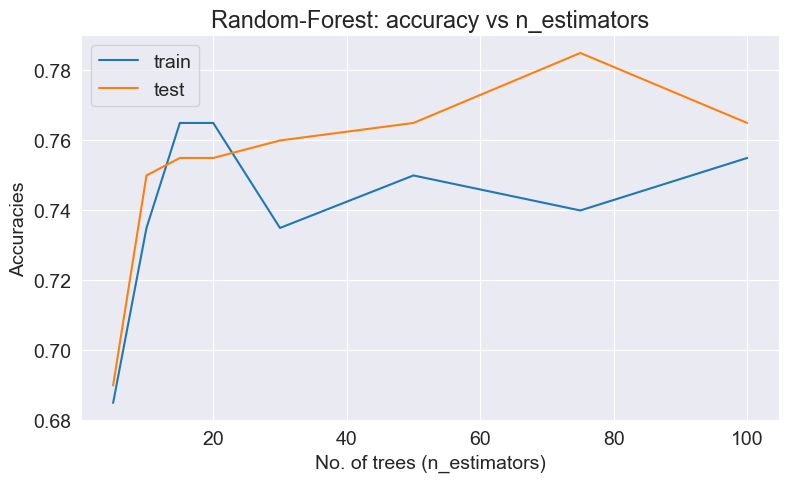

In [105]:
plt.plot(trees_grid, train_acc, label='train')
plt.plot(trees_grid, test_acc, label='test')
plt.legend()
plt.xlabel('No. of trees (n_estimators)')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs n_estimators')

Best accuracy is achived with 50 tress. In order to avoid overfitting (which happens at n_estimators=100), we need to add regularization parameters to our model.

In [106]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, max_depth=max_depth).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} max_depth".format(max(test_acc)*100, 
                                                        max_depth_grid[np.argmax(test_acc)]))

Best CV accuracy is 78.00% with 13 max_depth


The output indicates that the best cross-validation accuracy achieved is 78.00%, and it was attained when using a random forest classifier with a maximum depth of 13.

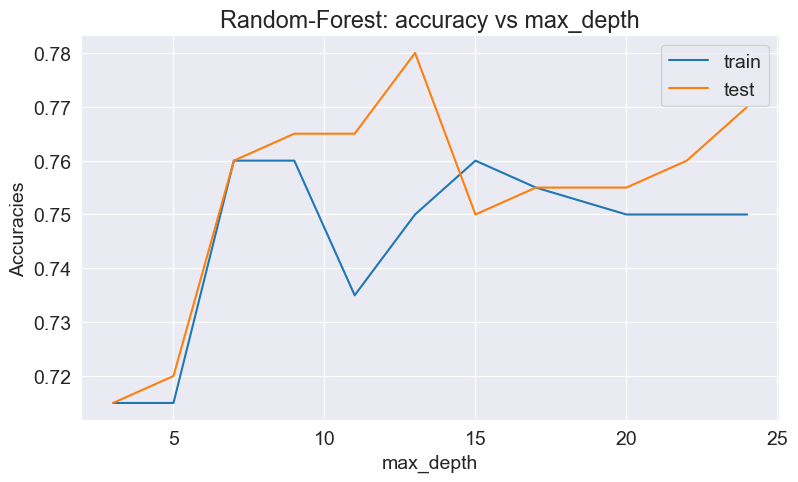

In [107]:
plt.plot(max_depth_grid, train_acc, label='train')
plt.plot(max_depth_grid, test_acc, label='test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs max_depth');

Best CV accuracy is 77.50% with 5 min_sample_leaf


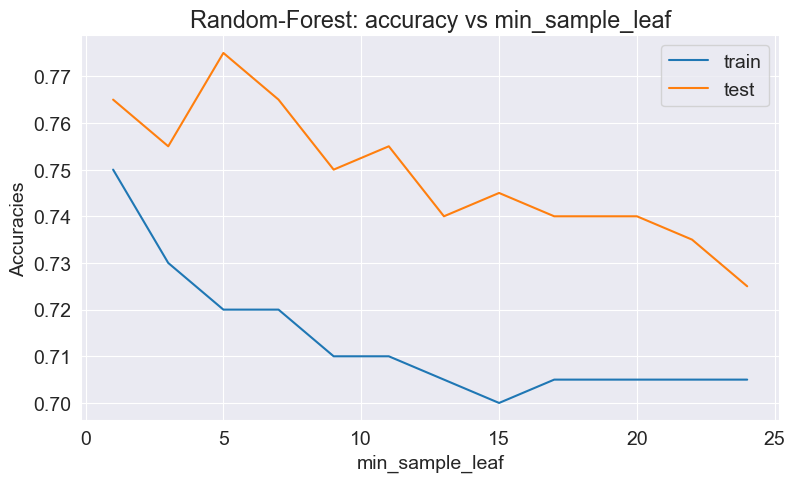

In [108]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_sample in min_samples_leaf_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, min_samples_leaf=min_sample).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} min_sample_leaf".format(max(test_acc)*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc)]))

plt.plot(min_samples_leaf_grid, train_acc, label='train')
plt.plot(min_samples_leaf_grid, test_acc, label='test')
plt.legend()
plt.xlabel('min_sample_leaf')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs min_sample_leaf');

The graphical output indicates that the best cross-validation accuracy achieved is 77.50%, and it was attained when using a random forest classifier with a minimum number of samples per leaf set to 5. 

Best CV accuracy is 79.50% with 16 max_features


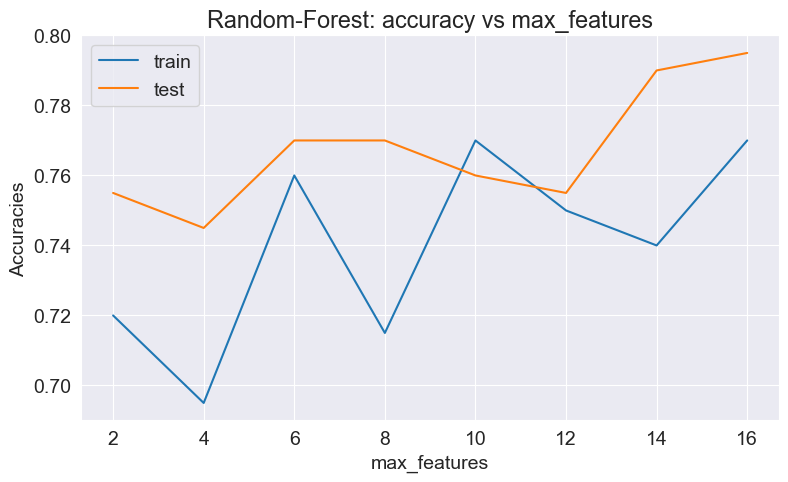

In [109]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_feature in max_features_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, max_features=max_feature).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} max_features".format(max(test_acc)*100, 
                                                        max_features_grid[np.argmax(test_acc)]))

plt.plot(max_features_grid, train_acc, label='train')
plt.plot(max_features_grid, test_acc, label='test')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs max_features');

The output indicates that the best cross-validation accuracy achieved is 79.50%, and it was attained when using a random forest classifier with a maximum number of features set to 16. The graphical representation is also depicted here.

In [110]:
# Initialize the set of parameters for exhaustive search and fit 
parameters = {'max_features': [7, 10, 16, 18], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [15, 20, 24, 27]}
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 24, 27],
                         'max_features': [7, 10, 16, 18],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

The output indicates that a grid search with cross-validation (10 folds) is being performed to tune the hyperparameters of a random forest classifier. Specifically, the grid search is evaluating 64 different combinations of hyperparameters (4 options for 'max_features' multiplied by 4 options for 'min_samples_leaf' multiplied by 4 options for 'max_depth'), resulting in a total of 640 fits. 

In [111]:
gcv.best_params_, gcv.best_score_

({'max_depth': 15, 'max_features': 18, 'min_samples_leaf': 1}, 0.76125)

The output indicates that after performing the grid search with cross-validation, the best combination of hyperparameters for the random forest classifier is:
'max_depth': 15
'max_features': 18
'min_samples_leaf': 1
The corresponding best mean cross-validated score achieved with these hyperparameters is approximately 0.76125.

### 8.4 GaussianNB

In [112]:
#import
from sklearn.naive_bayes import GaussianNB

In [113]:
# model

gnb= GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [114]:
#evaluation

print('Train accuracy:', cross_val_score(gnb, x_train, y_train, cv=skf).mean())
print('Test accuracy:', accuracy_score(y_test, gnb.predict(x_test)))

Train accuracy: 0.6512499999999999
Test accuracy: 0.7


The output indicates that the Gaussian Naive Bayes model achieved a train accuracy of approximately 65.12% and a test accuracy of 70%.

In [115]:
# Initializing the set of parameters for exhaustive search and fit 

parameters = {'max_features': [7, 10, 16, 18], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [15, 20, 24, 27]}
rf = XGBClassifier(n_estimators=50, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 24, 27],
                         'max_features': [7, 10, 16, 18],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [116]:
gcv.best_params_, gcv.best_score_

({'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1},
 0.7324999999999999)

The output indicates that the XGBoost classifier achieved the best cross-validated accuracy score of approximately 73.25% with the following hyperparameters:
- max_depth: 20
- max_features: 7
- min_samples_leaf: 1

### 8.5 KNN 

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [118]:
#evaluation

print('Train accuracy:', cross_val_score(knn, x_train, y_train, cv=skf).mean())
print('Test accuracy:', accuracy_score(y_test, knn.predict(x_test)))

Train accuracy: 0.68875
Test accuracy: 0.72


The output shows that the K-Nearest Neighbors classifier achieved a train accuracy of approximately 68.88% and a test accuracy of 72.00%.

### 8.6 Support Vector Classification

In [119]:
svc= SVC(kernel='linear',C=0.8, gamma=10,random_state=42).fit(x_train, y_train)

In [121]:
from sklearn.svm import SVC

# Initialize SVC with probability=True
svc = SVC(probability=True)

# Fit the model
svc.fit(x_train, y_train)

# Print ROC AUC score on the test dataset
print("ROC AUC score on test dataset: {:.2f}".format(roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1])))


ROC AUC score on test dataset: 0.80


The output indicates that the Support Vector Classifier (SVC) model has been trained and evaluated on the test dataset. Specifically, the ROC AUC (Receiver Operating Characteristic Area Under the Curve) score on the test dataset is reported to be 0.80.

In [122]:
print('Train accuracy:', cross_val_score(svc, x_train, y_train, cv=skf, scoring='recall').mean())
print('Recall score on test dataset:', recall_score(y_test, svc.predict(x_test)))
print("ROC AUC score on test dataset: {:.2f}".format(roc_auc_score(y_test,svc.predict_proba(x_test)[:, 1])))

Train accuracy: 0.3448333333333333
Recall score on test dataset: 0.3728813559322034
ROC AUC score on test dataset: 0.80


The output indicates the following metrics for the Support Vector Classifier (SVC):
- Train accuracy: 0.3448
- Recall score on the test dataset: 0.3729
- ROC AUC score on the test dataset: 0.80

### 9. Summary

Decision Tree :- 72.375%

Logistic Regression:- 77.33%

Random Forest:- 76.125%

GaussianNB:- 73.25%

KNN:- 72%

SVC (roc_auc):- 80%
    

## 10. Inferences and Conclusion


Based on the analysis of the German credit dataset, several key findings emerge:


* Loans with larger credit amounts, particularly those granted to individuals with no assets or only a car as their most valuable asset, present a heightened level of risk.


* Loans designated for educational purposes appear to carry an elevated level of risk compared to other loan categories.


* Applicants who are unemployed or have less than one year of employment experience represent a higher risk category. Similarly, unskilled candidates also demonstrate a greater risk profile.


* A discernible linear relationship exists between the credit amount and the duration of repayment. Generally, higher credit amounts tend to correspond with longer repayment durations.


These insights underscore the importance of considering various factors, such as applicant demographics and loan purposes, in assessing credit risk and making informed lending decisions.